# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

15

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

In [1]:
1-(0.85**100)

0.9999999125232637

The probability of getting at least one elixir is 99.9%

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

It takes on a countable number of values, X is either elixirs or no elixirs

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

The Binomial distribution.
The outcome is either there is elixirs or no elixirs in the fixed number of lootboxes and there is a fixed probability of successes(15%).

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
p_elixir = .15
n_boxes = 100

boxes_distn = stats.binom(n_boxes, p_elixir)

possible_elixir = list(range(0,21))

In [4]:
less_than_21 = 0
for box in range(21):
    less_than_21 += boxes_distn.pmf(box)
more_than_20 = 1 - less_than_21
more_than_20

0.06631976581888166

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

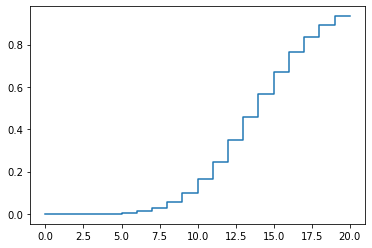

In [5]:
plt.step(possible_elixir,
        boxes_distn.cdf(possible_elixir))

In [6]:
1-boxes_distn.cdf(20)

0.06631976581888166

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

The chance that a user gets more than 20 elixirs is about 6%.

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

The Poisson distribution.
The outcome is to know the number of loot boxes that users purchased within the month, which is a fixed period of time.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [7]:
avg_users = int(round((500000/2.7),-3))
avg_users

185000

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [8]:
num_boxes = np.random.poisson(2.7, 185000)
      
high_value_list = [item for item in num_boxes if item>=5]
high_value = sum(high_value_list)
high_value


143177

In [9]:
num_boxes

array([0, 2, 0, ..., 5, 6, 2])

In [10]:
low_value_list = [item for item in num_boxes if item<5]
low_value = sum(low_value_list)
low_value

355718

#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

2 - The chance of getting 1 elixir in 100 loot box is very high but not definite.
3 - The chance of getting 20 elixirs in 100 loot box is very slim, around 6%.
4 - We will need at least 185,000 users to buy loot box to hit $500,000 in revenue for a month

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [11]:
def find_elixir():
#     boxes_array = np.random.binomial(n = 1, p = 0.15, size = 100)
#     get_elixir = np.random.choice(boxes_array, size = 100, replace = False)
    outcome = [0,1]
    get_elixir = np.random.choice(outcome, size = 100, p = [0.85, 0.15])
    for box in get_elixir:
        if box == 0:
            continue
        else:
            break
    return get_elixir

In [12]:
people = 100
boxes_needed = []
get_elixir = None
for p in range(people):
    box_count = 0
    for get_elixir in find_elixir():
        box_count += 1
        if get_elixir == 1:
            boxes_needed += (box_count,)
            break

print(boxes_needed)

[1, 8, 4, 3, 9, 2, 6, 9, 3, 3, 7, 13, 8, 5, 8, 1, 6, 1, 7, 2, 1, 15, 2, 3, 6, 6, 7, 22, 6, 1, 19, 2, 2, 5, 10, 6, 1, 4, 1, 4, 3, 2, 13, 9, 2, 5, 4, 9, 12, 2, 4, 4, 2, 10, 2, 2, 9, 8, 5, 1, 6, 7, 7, 13, 1, 7, 15, 3, 8, 1, 20, 5, 4, 14, 4, 13, 14, 10, 4, 1, 2, 4, 2, 1, 8, 8, 6, 13, 8, 14, 2, 11, 3, 1, 4, 2, 28, 6, 3, 3]


In [13]:
get_elixir_stats = []
for i in range(100000):
    bs_boxes_needed = np.random.choice(boxes_needed, size = 100, replace = True)
    bs_get_elixir_stat = np.mean(bs_boxes_needed)
    get_elixir_stats.append(bs_get_elixir_stat)

In [14]:
np.percentile(get_elixir_stats, 5)

5.42

In [15]:
np.percentile(get_elixir_stats, 25)

5.88

In [16]:
np.percentile(get_elixir_stats, 75)

6.56

In [17]:
np.percentile(get_elixir_stats, 95)

7.08

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

Dictionary. Types of item is the Key and the number of loot box needed is the value.

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

Compare the total revenue it generate in a month between Version 1 and Version 2.